# Проект: Исследование стартапов

Выполнила: Земскова Екатерина Григорьевна

## Введение: цели и задачи

**Цель:**: исследование исторических данных о стартапах с анализом успешности их дальнейшего развития и перепродажи.

**Задачи**: 
- Ознакомиться с содержимым данных.
- Сделать преобработку данных (поиск ошибок, аномальных значений, дубликатов).
- Провести исследовательский анализ: ознакомиться детально с данными, выявить корреляции.
- Сформулировать выводы и рекомендации для бизнеса.

**Структура проекта**
1. Загрузка данных и первичная предобработка.
2. Предобработка данных, предварительное исследование.
3. Исследовательский анализ данных.
4. Итоговые выводы.


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Для анализа поступили данных следующих файлов:
* acquisition.csv
* company_and_rounds.csv
* people.csv
* education.csv
* degrees.csv
* fund.csv
* investment.csv


### 1.1. Вывод общей информации, исправление названий столбцов

In [1]:
!pip install matplotlib-venn -q
from matplotlib_venn import venn2, venn3
!pip install missingno
import missingno as msno

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
PATH = "https://code.s3.yandex.net/datasets/"
acquisition = pd.read_csv(PATH + 'acquisition.csv')
company_and_rounds = pd.read_csv(PATH + 'company_and_rounds.csv')
education = pd.read_csv(PATH + 'education.csv')
people = pd.read_csv(PATH + 'people.csv')
degrees = pd.read_csv(PATH + 'degrees.csv')
fund = pd.read_csv(PATH + 'fund.csv')
investment = pd.read_csv(PATH + 'investment.csv')

In [4]:
company_and_rounds.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217471 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

Датасет company_and_rounds.csv содержит 22 столбца и 217774 строк, в которых представлена информация компаниях, раундах финансирования, датах открытия и закрытия, суммах финансирования и тп.

После первичного анализа данных можно сделать следующие выводы:

- Названия столбцов не соответствуют snake case, нуждаются в обработке.
- В столбцах:
company  ID, 
investment  rounds, 
funding rounds, 
milestones, 
funding round id, 
company  id, 
participants,
is  first  round, is  last  round тип данных float64, что не соответствует содержанию, больше подойдет int64, проверим далее. 
- Столбцы founded  at, closed  at, funded  at имеют тип object, а должен быть datetime64. 
- Столбцам is  first  round и is  last  round подойдет тип данных bool, а не float64.
- Пропуски содержатся во всех столбцах. Следует проверить на значения-индикаторы, и подробнее рассмотреть пропуски, поискать дубликаты.
- Есть столбцы, которые дублируют информацию: company  ID и company  id, пока что оставим их без изменений, посмотрим, возможно так получилось неслучайно.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

In [6]:
acquisition.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [7]:
acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


Датасет acquisition.csv содержит 6 столбцов и 9407 строк, в которых представлена информация о покупке компаний, вариантах расчета, сумме покупки и дате сделки.

После первичного анализа данных можно сделать следующие выводы:

- Названия столбцов соответствуют snake case.
- Данные столбцов id, acquiring_company_id, acquired_company_id, price_amount содержат числовые значения и хранятся в типах данных int64. Значения в столбцах term_code и acquired_at представлены типом object, хотя для term_code больше подходим тип category, а для acquired_at - datetime64. Вероятнее всего, дело в пропусках значений в этих столбцах. 
- Пропуски содержатся в столбцах term_code (на него приходится более половины пропусков) и acquired_at. Однако следует проверить и другие столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

In [8]:
education.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [9]:
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [10]:
education = education.rename(columns={'instituition': 'institution'})

Датасет education.csv содержит 4 столбца и 109610 строк, в которых представлена информация об образовании сотрудников компаний, учебном заведении и дате выпуска. 

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов соответствуют snake case.
- Данные столбца graduated_at имеют тип object вместо datetime64 из-за пропусков, которые составляют почти половину этого столбца. 
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

In [11]:
people.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [12]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226700 non-null  object 
 2   last_name         226705 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


Датасет people.csv содержит 5 столбцов и 226709 строк, в которых представлена информация о сотрудниках компаний, их именах и никнеймах в соцсетях.
После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов соответствуют snake case.
- Данные столбца company_id имеют тип float64 вместо int64.
- Пропуски есть во всех столбцах, кроме id. 
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

In [13]:
degrees.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [14]:
degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98389 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


Датасет degrees.csv содержит 4 столбца и 109610 строк, в которых представлена информация о типе образования сотрудника.
После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов соответствуют snake case.
- Данные столбца object_id имеют тип object вместо int64 и выглядят странно из-за "p:" в начале айди.  
- Пропуски есть в столбцах degree_type, subject. 
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

In [15]:
fund.head()

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


In [16]:
fund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11649 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


Датасет fund.csv содержит 9 столбцов и 11652 строк, в которых представлена информация о фондах.
После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов соответствуют snake case. 
- Пропуски есть в столбцах founded_at, domain, network_username, country_code. 
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

In [17]:
investment.head()

,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


In [18]:
investment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


Датасет investment.csv содержит 4 столбца и 61403 строк, в которых представлена информация о раундах инвестирования.
После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов соответствуют snake case. 
- Пропусков в таблице нет. 
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Больше всего пропусков содержится в датасете company_and_rounds.csv, начнем с него.  

Посмотрим, почему получились одинаковые столбцы company  ID и company  id, содержат ли они разную информацию, или от одного из них можно избавиться?

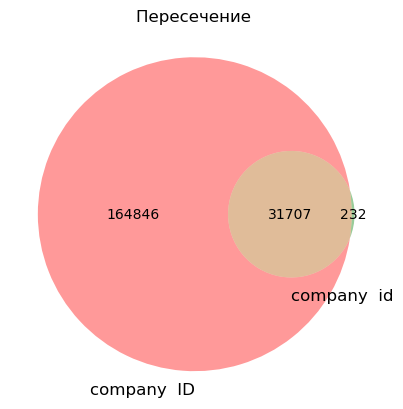

In [19]:
first_id = set(company_and_rounds['company  ID'].dropna().unique())
second_id = set(company_and_rounds['company  id'].dropna().unique())
venn2([first_id, second_id], set_labels=('company  ID', 'company  id'))
plt.title("Пересечение ")
plt.show() 

Вывод: информация в них почти одна и та же, кроме 232 компаний, которые присутствуют только в столбце company  id, удалять пока этот столбец не буду, изучим его значения далее.

### 1.2. Смена типов и анализ пропусков

In [20]:
company_and_rounds.columns

Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')

In [21]:
company_and_rounds.columns = company_and_rounds.columns.str.replace('  ', '_')

Хотя в данных много несоответствующих типов данных, по условиям задания нам нужно обработать тип данных только в столбцах с датой и временем:

In [22]:
company_and_rounds['founded_at'].unique()

array(['2005-10-17', nan, '2008-07-26', ..., '1996-02-15', '1962-06-05',
       '1988-05-13'], dtype=object)

In [23]:
for column in ['founded_at', 'closed_at', 'funded_at']:
    company_and_rounds[column] = pd.to_datetime(company_and_rounds[column])

In [24]:
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_ID           217472 non-null  float64       
 1   name                 217471 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [25]:
pd.DataFrame({'Количество пропусков': company_and_rounds.isna().sum(), 
              'Процент пропусков': round(company_and_rounds.isna().mean()*100, 2)})

,Количество пропусков,Процент пропусков
company_ID,302,0.14
name,303,0.14
category_code,73888,33.93
status,302,0.14
founded_at,107818,49.51
closed_at,214325,98.42
domain,70615,32.43
network_username,122240,56.13
country_code,109167,50.13
investment_rounds,302,0.14


In [26]:
acquisition['acquired_at'] = pd.to_datetime(acquisition['acquired_at'])

In [27]:
acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB


- Есть и в других таблицах столбцы, тип данных которых следовало бы преобразовать, но пока оставим их без изменений и возможно, в дальнейшем эти столбцы нам не понадобятся для исследования.
- Данных достаточно, несмотря на пропуски во многих таблицах. Есть есть хоть какая-то информация, попробуем ее проанализировать. 

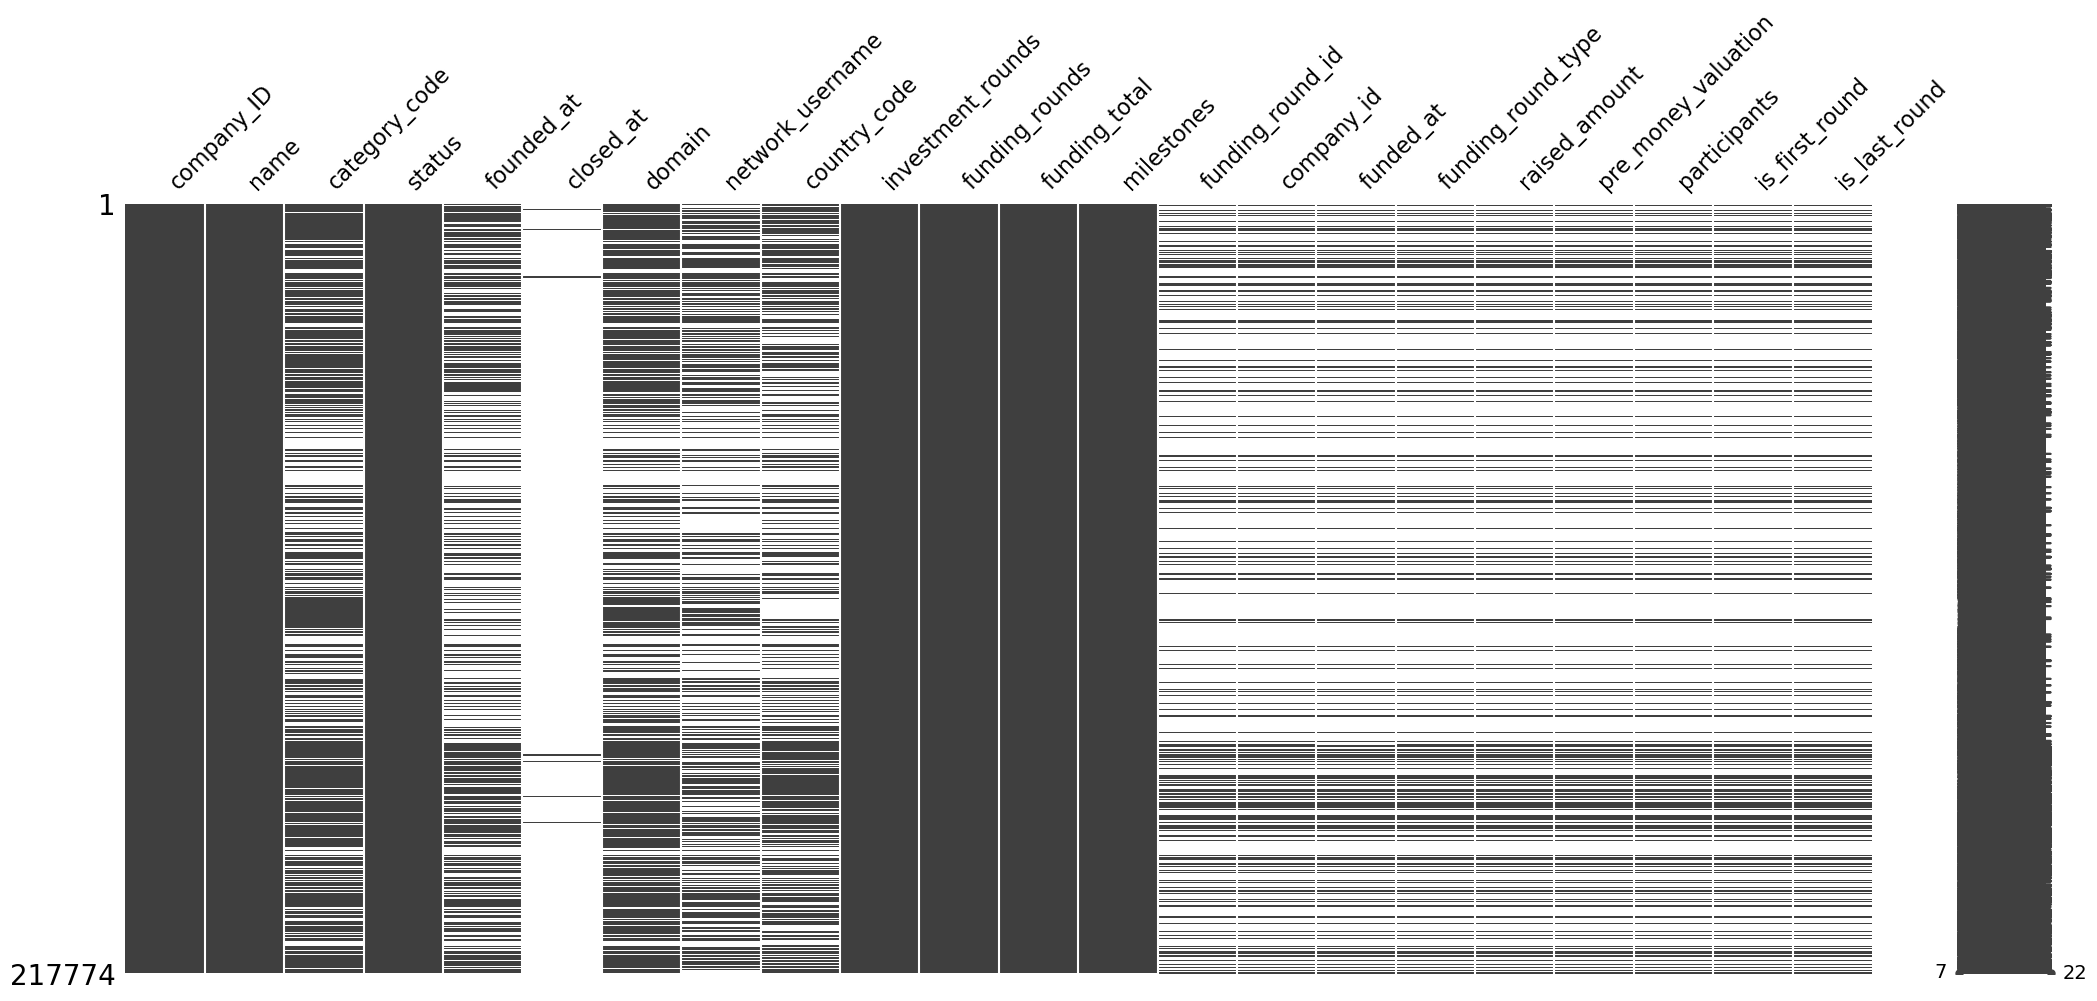

In [28]:
msno.matrix(company_and_rounds);

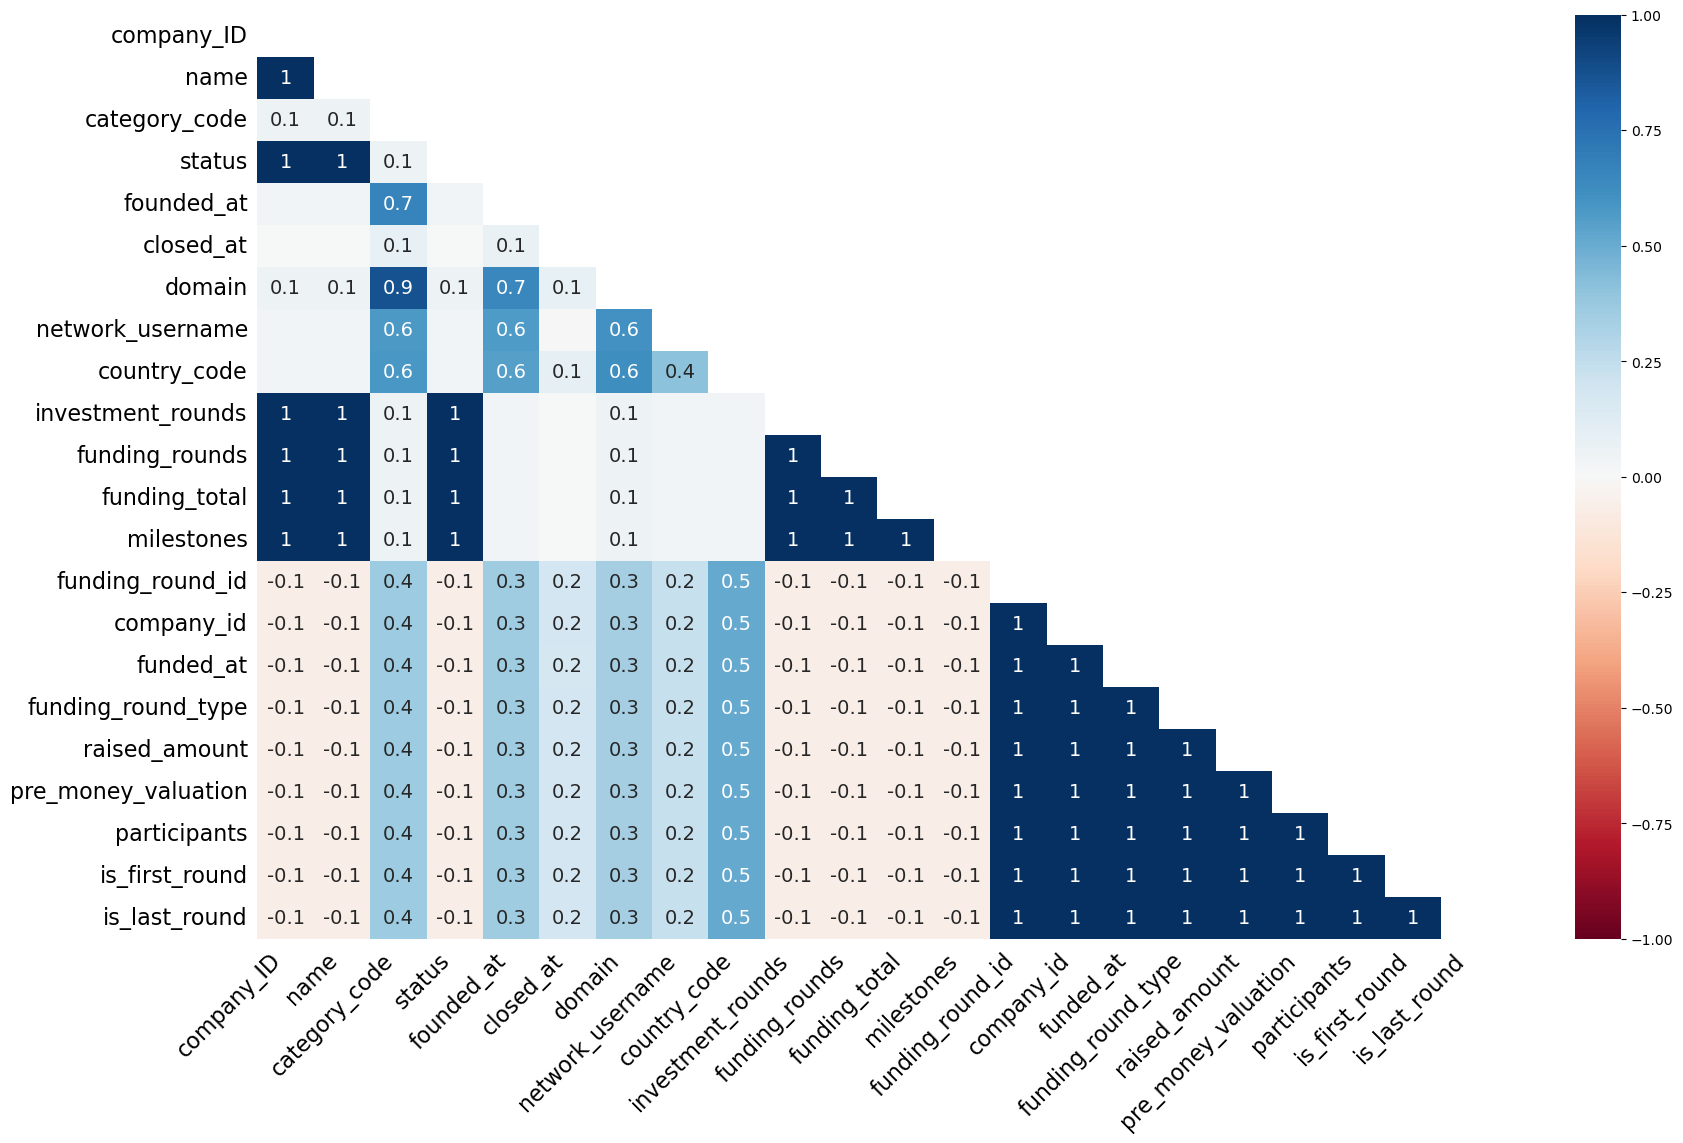

In [29]:
msno.heatmap(company_and_rounds);

Анализ пропусков:
- в файле company_and_rounds самое большое количество пропусков, которое четко делит таблицу на две части. 
- по матрице пропусков и по тепловой карте очевидно, в каких столбцах больше всего пропусков, и какая корреляция между ними. 
- заполнение такого количества пропусков невозможно, данные будут сильно искажены, поэтому в дальнейшем разделю эти две таблицы на две части согласно кластерам пропусков (вторая часть таблицы не просто имеет пропуски, они образуют перпендикулярные линии). Можно подтвердить гипотезу о том, что раньше данные о компаниях хранились отдельно от данных по раундам финансирования, и это было бы логичнее всего. 

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

In [30]:
company_and_rounds.head()

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
company_and_rounds['year'] = company_and_rounds['funded_at'].dt.year

In [32]:
pivot_rounds_years= pd.pivot_table(company_and_rounds,
                             index='year',
                             values='raised_amount',
                             aggfunc=['median', 'count'])
pivot_rounds_years

,median,count
,raised_amount,raised_amount
year,,
1960.0,0.0,9
1973.0,0.0,1
1974.0,0.0,2
1984.0,41000.0,3
1985.0,0.0,1
1987.0,1250000.0,2
1989.0,15000.0,1
1990.0,1000000.0,1


In [33]:
pivot_rounds_years_filtered = pivot_rounds_years.loc[pivot_rounds_years[('count', 'raised_amount')] > 50]
pivot_rounds_years_filtered.reset_index()

,year,median,count
,,raised_amount,raised_amount
0,1999.0,2000000.0,76
1,2000.0,4200000.0,125
2,2001.0,3000000.0,96
3,2002.0,4200000.0,116
4,2003.0,3000000.0,159
5,2004.0,5000000.0,291
6,2005.0,5500000.0,1633
7,2006.0,5000000.0,2436
8,2007.0,3973320.0,3279


/var/folders/ck/44ppn7p90_5fhyt_cqwvjfqc0000gn/T/ipykernel_19624/3866896474.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_rounds_years_filtered["smoothed"] = pivot_rounds_years_filtered[('median', 'raised_amount')].rolling(window=3, center=True).mean()


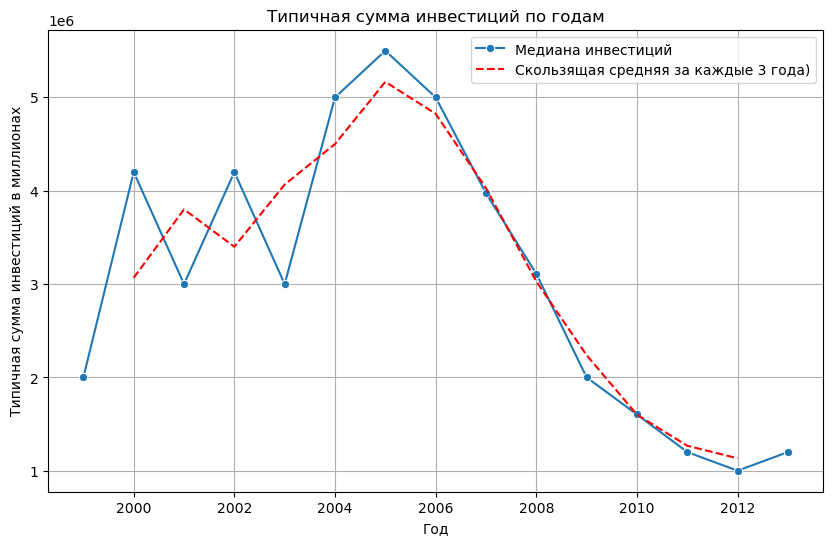

In [34]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=pivot_rounds_years_filtered, x='year', y=('median', 'raised_amount'), marker='o', label="Медиана инвестиций")

pivot_rounds_years_filtered["smoothed"] = pivot_rounds_years_filtered[('median', 'raised_amount')].rolling(window=3, center=True).mean()
# График скользящей средней
sns.lineplot(data=pivot_rounds_years_filtered, x='year', y="smoothed", linestyle="dashed", color="red", label="Скользящая средняя за каждые 3 года)")

plt.xlabel('Год')
plt.ylabel('Типичная сумма инвестиций в миллионах')
plt.title('Типичная сумма инвестиций по годам')
plt.grid(True)
plt.legend()
plt.show()

Итог:
- В 2000 году размер собранных в рамках одного раунда средств был максимален.
- В 2013 году было зафиксировано максимальное число раундов, и после долгого спада наметился рост в сумме средств в рамках каждого раунда. 


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

- Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.
- Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

In [35]:
df_people = people.merge(education, left_on='id', right_on='person_id', how='left')
df_people.head()

,id_x,first_name,last_name,company_id,network_username,id_y,person_id,institution,graduated_at
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaN
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaN
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaN
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaN


degrees.csv не получится присоединить, пока столбец object_id имеет тип данных object и пока строки имеют вид "p:".

In [36]:
degrees['object_id'].unique()

array(['p:6117', 'p:6136', 'p:6005', ..., 'p:268589', 'p:268527',
       'p:268528'], dtype=object)

In [37]:
degrees['object_id'] = degrees['object_id'].str[2:]

In [38]:
degrees['object_id'].unique()

array(['6117', '6136', '6005', ..., '268589', '268527', '268528'],
      dtype=object)

In [39]:
degrees['object_id'] = pd.to_numeric(degrees['object_id'])

In [40]:
df_people_edu = df_people.merge(degrees, left_on='person_id', right_on='object_id', how='left') 

In [41]:
df_people_edu = df_people_edu.drop(columns=['person_id', 'object_id', 'id_y', 'id'])

In [42]:
df_people_edu = df_people_edu.rename(columns={'id_x': 'employee_id'})

In [43]:
df_people_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370836 entries, 0 to 370835
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   employee_id       370836 non-null  int64  
 1   first_name        370827 non-null  object 
 2   last_name         370832 non-null  object 
 3   company_id        70869 non-null   float64
 4   network_username  81529 non-null   object 
 5   institution       212109 non-null  object 
 6   graduated_at      113991 non-null  object 
 7   degree_type       190719 non-null  object 
 8   subject           156477 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 25.5+ MB


In [44]:
df_people_edu[['employee_id', 'first_name', 'last_name']].duplicated().sum()

144128

In [45]:
df_people_edu = df_people_edu.drop_duplicates(subset=['employee_id', 'first_name', 'last_name'])

In [46]:
df_people_edu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 226708 entries, 0 to 370835
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   employee_id       226708 non-null  int64  
 1   first_name        226699 non-null  object 
 2   last_name         226704 non-null  object 
 3   company_id        34614 non-null   float64
 4   network_username  38867 non-null   object 
 5   institution       68031 non-null   object 
 6   graduated_at      36387 non-null   object 
 7   degree_type       61398 non-null   object 
 8   subject           50808 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 17.3+ MB


Все преобразования выше помгли подготовить датасет с данными сотрудников: df_people_edu.

In [47]:
df_people_edu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 226708 entries, 0 to 370835
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   employee_id       226708 non-null  int64  
 1   first_name        226699 non-null  object 
 2   last_name         226704 non-null  object 
 3   company_id        34614 non-null   float64
 4   network_username  38867 non-null   object 
 5   institution       68031 non-null   object 
 6   graduated_at      36387 non-null   object 
 7   degree_type       61398 non-null   object 
 8   subject           50808 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 17.3+ MB


In [48]:
people_companies = pd.pivot_table(df_people_edu,
                             index='company_id',
                             values='employee_id',
                             aggfunc='count')
people_companies = people_companies.sort_values(by='employee_id', ascending=False)
print(people_companies)

            employee_id
company_id             
59.0                244
29.0                150
1242.0              138
231067.0             72
499.0                63
...                 ...
63585.0               1
7258.0                1
63581.0               1
63580.0               1
70873.0               1

[22921 rows x 1 columns]


In [49]:
people_companies = people_companies.rename(columns={'employee_id': 'num_employees'})

In [50]:
people_companies

,num_employees
company_id,
59.0,244
29.0,150
1242.0,138
231067.0,72
499.0,63
...,...
63585.0,1
7258.0,1
63581.0,1


In [51]:
people_companies['num_employees'].value_counts().sort_values()

num_employees
244        1
150        1
48         1
138        1
72         1
61         1
51         1
63         1
47         1
36         1
35         1
32         1
31         1
39         1
26         1
21         2
22         2
56         2
29         2
25         2
19         3
23         3
15         3
20         3
18         3
16         4
17         5
14         8
12        16
13        17
10        25
11        30
9         46
8         59
7        100
6        138
5        237
4        450
3        921
2       2709
1      18116
Name: count, dtype: int64

По распределению значений количества сотрудников я решила распределить компании на следующие группы:
- компании с одним сотрудником (ИП/самозанятые);
- компании с числом сотрудников от 2 до 10 - микробизнес;
- компании с числом сотрудников от 11 до 50 - малый бизнес;
- компании с числом сотрудников от 51 до 250 - средний бизнес;
- компании с числом сотрудников более 250 - крупный бизнес.

In [52]:
def size(x):
    if x == 1:
        return 'ИП/самозанятые'
    elif x > 1 and x <= 10:
        return 'микробизнес'
    elif x >10 and x <= 50:
        return 'малый бизнес'
    elif x >50 and x <= 250:
        return 'средний бизнес'
    else:
        return 'крупный бизнес'
    

In [53]:
people_companies['company_size'] = people_companies['num_employees'].apply(size)

In [54]:
people_companies

,num_employees,company_size
company_id,,
59.0,244,средний бизнес
29.0,150,средний бизнес
1242.0,138,средний бизнес
231067.0,72,средний бизнес
499.0,63,средний бизнес
...,...,...
63585.0,1,ИП/самозанятые
7258.0,1,ИП/самозанятые
63581.0,1,ИП/самозанятые


In [55]:
df_people_edu = df_people_edu.merge(people_companies, on='company_id')
df_people_edu.head()

,employee_id,first_name,last_name,company_id,network_username,institution,graduated_at,degree_type,subject,num_employees,company_size
0,10,Mark,Zuckerberg,5.0,NaN,Harvard University,NaN,NaN,Computer Science,61,средний бизнес
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaN,10,микробизнес
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaN,3,микробизнес
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaN,2,микробизнес
4,100006,Courtney,Homer,81558.0,jobsbostontech,MIT Sloan School of Management,2004-01-01,MBA,Strategy & Marketing,2,микробизнес


In [56]:
df_people_edu['is_info'] = np.where((df_people_edu['institution'].isnull()) & (df_people_edu['degree_type'].isnull()) & (df_people_edu['subject'].isnull()), 0, 1)

In [57]:
edu_info = df_people_edu.groupby('company_size')['is_info'].count().reset_index()
edu_info = edu_info.rename(columns={'is_info': 'all_employees'})
edu_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   company_size   4 non-null      object
 1   all_employees  4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes


In [58]:
edu_no_info = df_people_edu.loc[df_people_edu['is_info'] == 0].groupby('company_size')['is_info'].count().reset_index()
edu_no_info = edu_no_info.rename(columns={'is_info': 'employees_with_no_info'})
edu_no_info

,company_size,employees_with_no_info
0,ИП/самозанятые,8380
1,малый бизнес,733
2,микробизнес,6782
3,средний бизнес,255


In [59]:
edu = edu_info.merge(edu_no_info, on='company_size')
edu['perc_no_info'] = round(edu['employees_with_no_info'] * 100 / edu['all_employees'], 2)
edu

,company_size,all_employees,employees_with_no_info,perc_no_info
0,ИП/самозанятые,18116,8380,46.26
1,малый бизнес,1777,733,41.25
2,микробизнес,13830,6782,49.04
3,средний бизнес,891,255,28.62


Выводы:
- Решение разделить на группы обосновано на самых распространенных классификациях для бизнеса, плюс большую долю компаний составляют компании из одного сотрудника, их я выделила отдельно. 
- Крупный бизнес не встречается в наших данных.
- Чем меньше бизнес, тем выше доля сотрудников, об образовании которых у нас нет данных. Самый высокий процент среди ип/самозанятых (46.26%) и микробизнеса (49.04%). 

- Есть связь  межу числом сотрудников и количеством данных об их образовании: в больших компаниях есть эйчары, которые занимаются поиском сотрудников, их трудоустройством, и конечно, тоже ведут статистику. В маленьких компаниях эти процессы менее формальны.
- Возможно, в маленьких компаниях часть функций отдана на аутсорс, поэтому люди, работающие на компанию не оформлены в ней как сотрудники. 

Итог: 
- столбец network_username нельзя использовать для объединения с другими таблицами, так как на один network_username может быть и 1, и даже 20 company_ID (например, у Goodman_UK).
- кроме того, бывает, что network_username не указан у компании. 

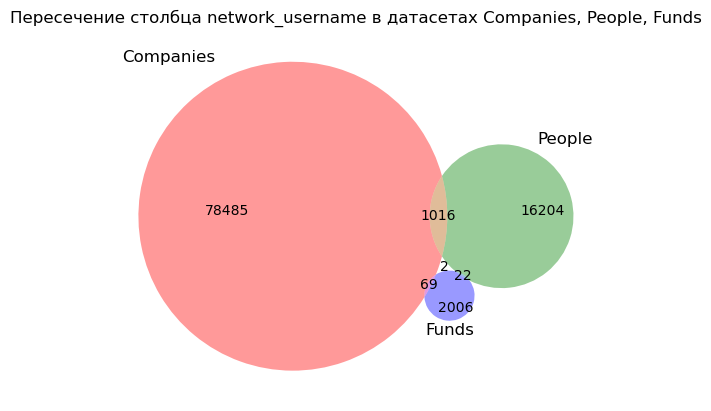

In [60]:
venn3([set(company_and_rounds['network_username']), set(df_people_edu['network_username']), set(fund['network_username'])], set_labels=('Companies', 'People', 'Funds'))
plt.title("Пересечение столбца network_username в датасетах Companies, People, Funds")
plt.show() 

Посмотрим на три датасета, которые сдержат столбец network_username: это company_and_rounds, df_people_edu, fund.
В трехдатасетах есть столбцы с одинаковым названием, но согласно диаграмме, пересечений между значениями столбца с одинаковым названием практически нет. 
Это объясняется описанием данных по каждой таблице:
- company_and_rounds -network_username - это ник компании в сети;
- df_people_edu - network_username - ник человека в социальных сетях;
- fund - network_username - ник фонда в сети.

Вывод: использовать этот столбец для объединения невозможно.


### 2.4. Причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.
По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

In [61]:
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_ID           217472 non-null  float64       
 1   name                 217471 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

По количеству строк и названиям столбцов явно видно, что скорее всего когда-то данные хранились в двух датасетах: датасет о компаниях и второй о раундах финансирования. Разделим таблицу на две:

In [62]:
companies = company_and_rounds[['company_ID', 
                                'name', 
                                'category_code', 
                                'status',
                                'founded_at',
                                'closed_at', 
                                'domain', 
                                'network_username', 
                                'country_code',
                                'investment_rounds',
                                'funding_rounds',
                                'funding_total',
                                'milestones']]
companies.head()

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0


In [63]:
companies.duplicated().sum() 

21220

In [64]:
companies = companies.drop_duplicates(subset=None, keep='first', inplace=False)
companies.reset_index()
companies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196554 entries, 0 to 217472
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_ID         196553 non-null  float64       
 1   name               196552 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196553 non-null  float64       
 10  funding_rounds     196553 non-null  float64       
 11  funding_total      196553 non-null  float64       
 12  milestones         196553 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)
memor

In [65]:
rounds = company_and_rounds[['funding_round_id', 
                                'company_id', 
                                'funded_at', 
                                'funding_round_type',
                                'raised_amount',
                                'pre_money_valuation', 
                                'participants', 
                                'is_first_round', 
                                'is_last_round',
                                'year']]

In [66]:
rounds = rounds.drop_duplicates(subset=None, keep='first', inplace=False)
rounds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52929 entries, 0 to 217773
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52928 non-null  float64       
 1   company_id           52928 non-null  float64       
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float64       
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  float64       
 7   is_first_round       52928 non-null  float64       
 8   is_last_round        52928 non-null  float64       
 9   year                 52680 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 4.4+ MB


Я посчитала, что самым правильным будет разделить таблицу исходя их количества строк в столбцах(в первой части - 217472, во второй - 52928). 
Есть и другие подсказки, что данные хранились ранее именно в двух таблицах:
- само название объединенного датасета (company and rounds);
- названия столбцов и их порядок, в середине таблицы появляется столбец funding round id и далее снова company id;


## Шаг 3. Исследовательский анализ объединённых таблиц



### 3.1. Объединение данных

In [67]:
companies_joined = companies.merge(acquisition, left_on='company_ID', right_on='acquired_company_id', how='left')

In [68]:
companies_joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196697 entries, 0 to 196696
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   company_ID            196696 non-null  float64       
 1   name                  196695 non-null  object        
 2   category_code         123307 non-null  object        
 3   status                196696 non-null  object        
 4   founded_at            91331 non-null   datetime64[ns]
 5   closed_at             2620 non-null    datetime64[ns]
 6   domain                126674 non-null  object        
 7   network_username      80679 non-null   object        
 8   country_code          88106 non-null   object        
 9   investment_rounds     196696 non-null  float64       
 10  funding_rounds        196696 non-null  float64       
 11  funding_total         196696 non-null  float64       
 12  milestones            196696 non-null  float64       
 13 

In [69]:
companies_joined.duplicated().sum()

0

In [70]:
companies_joined.duplicated(subset='company_ID').sum()

143

In [71]:
companies_joined[companies_joined.duplicated(subset='company_ID', keep=False)].head(20)

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
1731,10963.0,TNC,web,acquired,2004-01-01,NaT,tnccompany.com,NaN,NaN,0.0,1.0,0.0,2.0,542.0,59.0,10963.0,NaN,0.0,2008-09-12
1732,10963.0,TNC,web,acquired,2004-01-01,NaT,tnccompany.com,NaN,NaN,0.0,1.0,0.0,2.0,2484.0,59.0,10963.0,NaN,0.0,2008-09-12
2600,11716.0,Hotjobs,NaN,acquired,NaT,NaT,NaN,NaN,NaN,0.0,0.0,0.0,3.0,2985.0,1735.0,11716.0,cash,225000000.0,2010-02-03
2601,11716.0,Hotjobs,NaN,acquired,NaT,NaT,NaN,NaN,NaN,0.0,0.0,0.0,3.0,9033.0,29.0,11716.0,cash,436000000.0,2002-01-11
2892,11943.0,Opusforum.org,NaN,acquired,NaT,NaT,NaN,NaN,DEU,0.0,0.0,0.0,0.0,633.0,20.0,11943.0,NaN,0.0,2005-06-30
2893,11943.0,Opusforum.org,NaN,acquired,NaT,NaT,NaN,NaN,DEU,0.0,0.0,0.0,0.0,8562.0,204845.0,11943.0,NaN,0.0,2005-01-01
3185,1216.0,Evite,web,acquired,1998-01-01,NaT,evite.com,evite,USA,0.0,0.0,0.0,2.0,198.0,185.0,1216.0,NaN,0.0,2001-03-09
3186,1216.0,Evite,web,acquired,1998-01-01,NaT,evite.com,evite,USA,0.0,0.0,0.0,2.0,6238.0,1504.0,1216.0,stock,0.0,2010-12-02
4025,12829.0,Menupages,web,acquired,NaT,NaT,menupages.com,NaN,NaN,0.0,0.0,0.0,2.0,1810.0,8252.0,12829.0,NaN,0.0,2008-07-16
4026,12829.0,Menupages,web,acquired,NaT,NaT,menupages.com,NaN,NaN,0.0,0.0,0.0,2.0,6213.0,117902.0,12829.0,NaN,0.0,2011-09-26


In [72]:
acquisition.duplicated(subset=['acquiring_company_id', 'acquired_company_id', 'acquired_at']).sum()

12

Полных дубликатов в объединенной таблице нет, но есть дубликаты по полям company_ID и acquired_company_id. Эти дубликаты я оставлю, так как они не являются полными: иногда одну компанию выкупают несколько раз. Также выяснилось, что в изначальной таблице acquisition есть дубликаты по трем полям, их всего 12, но из-за того, что каждой покупке присвоен свой id, в объединенной таблице они в разных стороках. Их доля ничтожно мала, и такие дубликаты можно удалить.

In [73]:
companies_joined.duplicated(subset=['company_ID', 'acquiring_company_id', 'acquired_company_id', 'acquired_at']).sum()

12

In [74]:
companies_joined = companies_joined.drop_duplicates(subset=['company_ID', 'acquiring_company_id', 'acquired_company_id', 'acquired_at'], keep='first', inplace=False)

In [75]:
companies_joined.duplicated(subset=['company_ID', 'acquiring_company_id', 'acquired_company_id', 'acquired_at']).sum()

0

In [76]:
filtered_companies = companies_joined[(companies_joined['funding_rounds'] > 0) | 
          (companies_joined['investment_rounds'] > 0) | 
          (companies_joined['status'] == 'acquired')]
filtered_companies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40878 entries, 0 to 196695
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_ID            40878 non-null  float64       
 1   name                  40878 non-null  object        
 2   category_code         35429 non-null  object        
 3   status                40878 non-null  object        
 4   founded_at            27904 non-null  datetime64[ns]
 5   closed_at             2128 non-null   datetime64[ns]
 6   domain                35873 non-null  object        
 7   network_username      20934 non-null  object        
 8   country_code          34850 non-null  object        
 9   investment_rounds     40878 non-null  float64       
 10  funding_rounds        40878 non-null  float64       
 11  funding_total         40878 non-null  float64       
 12  milestones            40878 non-null  float64       
 13  id                  

Посколько в дальнейшем многие столбцы в исследовании не нужны, я оставлю в таблице только самые необходимые:

In [77]:
filtered_companies = filtered_companies[['company_ID',
                                        'name',
                                         'category_code',
                                         'status',
                                         'investment_rounds',
                                         'funding_rounds',
                                         'funding_total',
                                        'price_amount',
                                        'acquired_at']]
filtered_companies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40878 entries, 0 to 196695
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_ID         40878 non-null  float64       
 1   name               40878 non-null  object        
 2   category_code      35429 non-null  object        
 3   status             40878 non-null  object        
 4   investment_rounds  40878 non-null  float64       
 5   funding_rounds     40878 non-null  float64       
 6   funding_total      40878 non-null  float64       
 7   price_amount       9378 non-null   float64       
 8   acquired_at        9349 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 3.1+ MB


In [78]:
filtered_companies.head()

,company_ID,name,category_code,status,investment_rounds,funding_rounds,funding_total,price_amount,acquired_at
0,1.0,Wetpaint,web,operating,0.0,3.0,39750000.0,NaN,NaT
1,10.0,Flektor,games_video,acquired,0.0,0.0,0.0,20000000.0,2007-05-30
2,100.0,There,games_video,acquired,0.0,0.0,0.0,0.0,2005-05-29
13,1001.0,FriendFeed,web,acquired,0.0,1.0,5000000.0,47500000.0,2009-08-10
18,10014.0,Mobclix,mobile,acquired,0.0,1.0,0.0,0.0,2010-09-30



### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

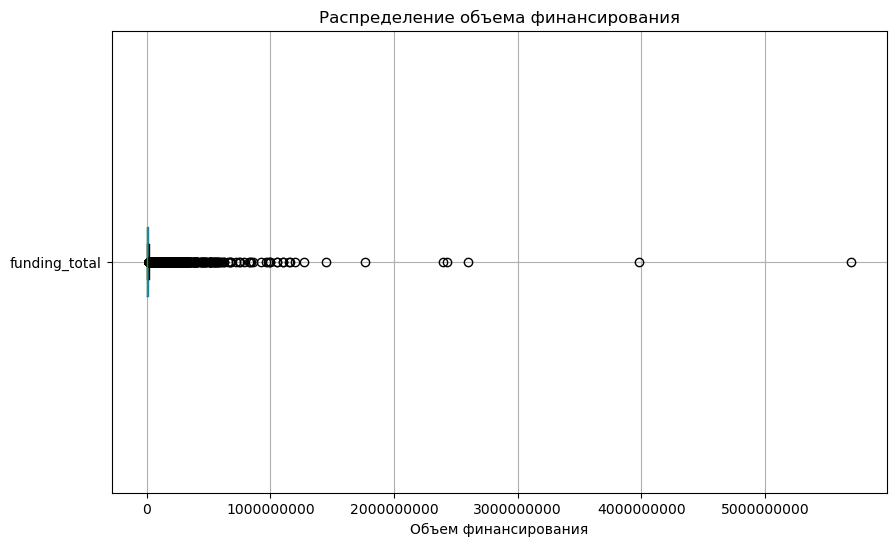

In [79]:
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain')
filtered_companies.boxplot(column='funding_total', vert=False)
plt.title('Распределение объема финансирования')
plt.xlabel('Объем финансирования')
plt.show()

Из-за больших цифр в объеме финансирования очень сложно оценить визуально, сам ящик не видно, поэтому попробуем добавить фильтрацию, оставим только те значения funding_total, которые больше нуля и  уберем  выбросы (те, что более 10000000) 

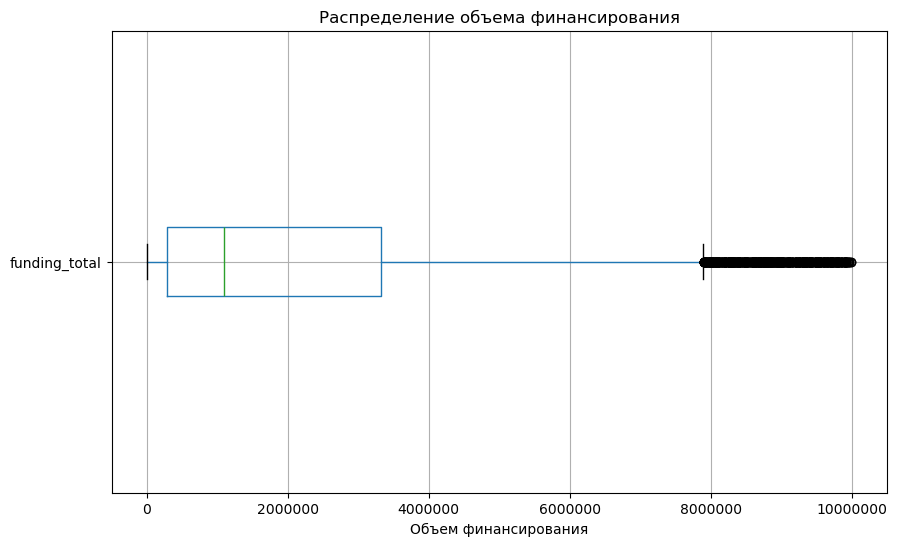

In [80]:
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain')
filtered_companies[(filtered_companies['funding_total'] < 10000000)&(filtered_companies['funding_total'] >0)].boxplot(column='funding_total', vert=False)
plt.title('Распределение объема финансирования')
plt.xlabel('Объем финансирования')
plt.show()

Среди всех объемов финансирования, которые больше нуля и менее 10000000, наиболее типичное значение примерно 1500000.
Попробуем оценить статистические показатели:

In [81]:
filtered_companies['funding_total'].describe()

count    4.087800e+04
mean     1.013856e+07
std      5.642090e+07
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+05
75%      5.641468e+06
max      5.700000e+09
Name: funding_total, dtype: float64

- Средний показатель общего объема финансирования - 1.013561e+07, а медиана - 6.000000e+05, но без фильтрации по каким-либо показателям этих значений на диаграммах мы не увидим. К тому же такая большая разница между медианой и средним говорит о большом разбросе сумм.

Вывод: при таких больших значениях стандартные методы оценки показателей не отражают реальную картину.

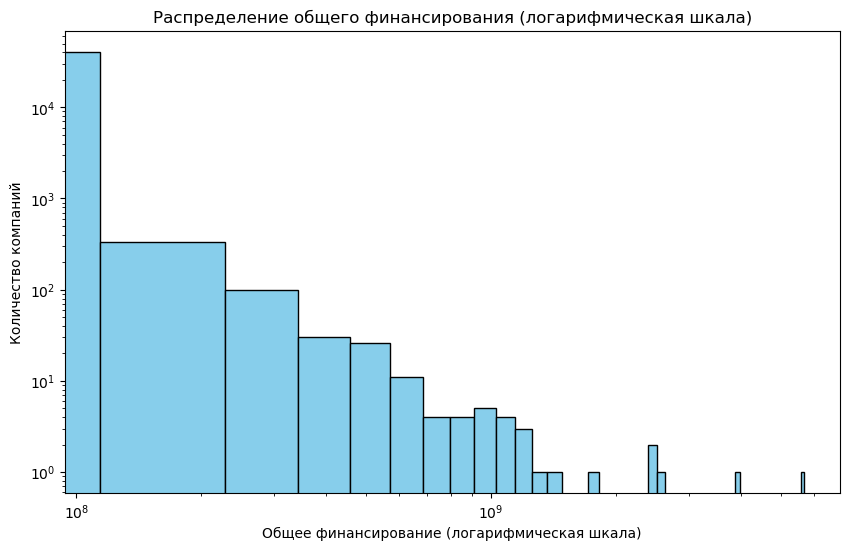

In [82]:
plt.figure(figsize=(10, 6))
plt.hist(filtered_companies['funding_total'], bins=50, color='skyblue', edgecolor='black', log=True)
plt.xscale('log')  # Логарифмическая шкала по оси X
plt.xlabel('Общее финансирование (логарифмическая шкала)')
plt.ylabel('Количество компаний')
plt.title('Распределение общего финансирования (логарифмическая шкала)')
plt.show()

- Очень небольшое количество компаний смогли привлечь большой объем инвестиций (больше миллиарда).
- Первый и самый значительный порог выброса - 100 млн долл.  

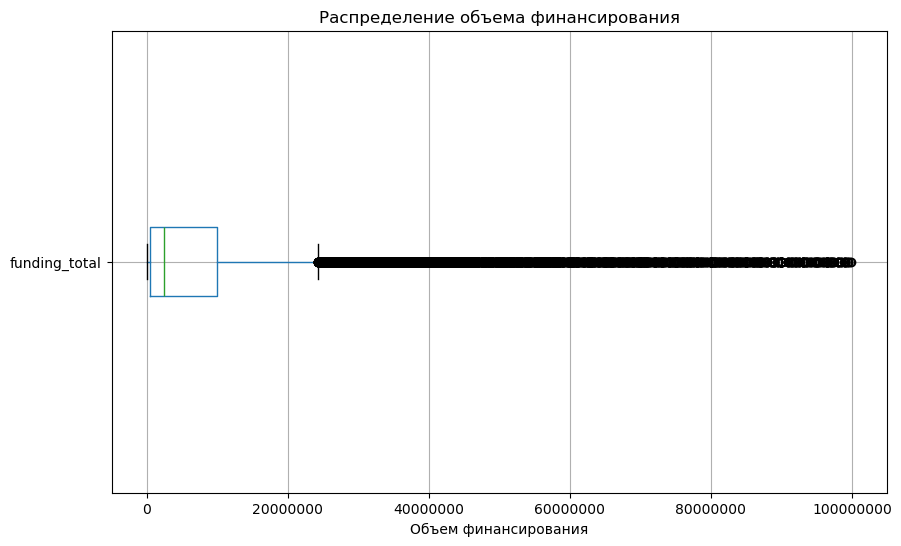

In [83]:
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain')
filtered_companies[(filtered_companies['funding_total'] > 0)&(filtered_companies['funding_total'] < 100000000)].boxplot(column='funding_total', vert=False)
plt.title('Распределение объема финансирования')
plt.xlabel('Объем финансирования')
plt.show()

Среди компаний с объемом финансирования до 100 млн долл и больше нуля:
- Медиана на отметке 20-30 тыс долл.
- А общий объем финансирования редко превышает 250 тыс.

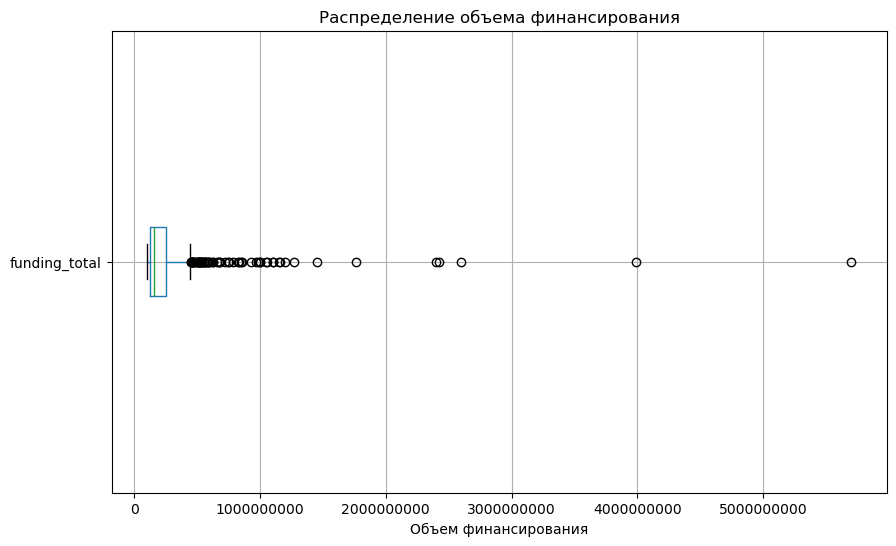

In [84]:
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain')
filtered_companies[filtered_companies['funding_total'] > 100000000].boxplot(column='funding_total', vert=False)
plt.title('Распределение объема финансирования')
plt.xlabel('Объем финансирования')
plt.show()


### 3.3. Куплены забесплатно?

- Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют.

In [85]:
zero_companies = filtered_companies[(filtered_companies['funding_total'] > 0) & 
                                    (filtered_companies['status'] == 'acquired') &
                                    ((filtered_companies['price_amount'] == 0) |
                                    (filtered_companies['price_amount'] == 1))]
zero_companies

,company_ID,name,category_code,status,investment_rounds,funding_rounds,funding_total,price_amount,acquired_at
66,10054.0,Jumptap,mobile,acquired,0.0,7.0,121500000.0,0.0,2013-08-13
170,101312.0,SideTour,web,acquired,0.0,3.0,4000000.0,0.0,2013-09-18
177,101340.0,ChoicePass,enterprise,acquired,0.0,1.0,250000.0,0.0,2012-06-18
181,10137.0,Producteev,software,acquired,0.0,3.0,1310000.0,0.0,2012-11-05
184,10139.0,TradeCard,enterprise,acquired,0.0,2.0,44925000.0,0.0,2013-04-01
...,...,...,...,...,...,...,...,...,...
196402,99.0,Amie Street,web,acquired,0.0,2.0,3900000.0,0.0,2010-09-22
196411,9905.0,UBmatrix,software,acquired,0.0,2.0,5172350.0,0.0,2010-06-24
196430,992.0,wunderloop,advertising,acquired,0.0,1.0,10000000.0,0.0,2010-07-02
196489,997.0,Zimbra,enterprise,acquired,0.0,1.0,14500000.0,0.0,2013-07-15


Попробуем исследовать покупки за 1 или за 0 доллар, возможно, дело в экономическом кризисе? сгруппируем эти покупки по годам: 

In [86]:
zero_companies['year'] = zero_companies['acquired_at'].dt.year

/var/folders/ck/44ppn7p90_5fhyt_cqwvjfqc0000gn/T/ipykernel_19624/2550436852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_companies['year'] = zero_companies['acquired_at'].dt.year


In [87]:
pivot_zero= pd.pivot_table(zero_companies,
                             index='year',
                             values='company_ID',
                             aggfunc='count')
pivot_zero.reset_index()
pivot_zero = pivot_zero.rename(columns={'company_ID': 'num_companies_selled_for_0'})
pivot_zero

,num_companies_selled_for_0
year,
1997.0,1
1998.0,2
2000.0,1
2001.0,2
2002.0,2
2004.0,4
2005.0,5
2006.0,31
2007.0,57


Теперь посмотрим на долю покупок за 0 и за 1 доллар от всех купленных компаний с ненулевым общим объемом финансированияпо годам:

In [88]:
acquired_companies = filtered_companies[(filtered_companies['funding_total'] > 0) &
                                        (filtered_companies['status'] == 'acquired')]
acquired_companies['year'] = filtered_companies['acquired_at'].dt.year

/var/folders/ck/44ppn7p90_5fhyt_cqwvjfqc0000gn/T/ipykernel_19624/1312087763.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acquired_companies['year'] = filtered_companies['acquired_at'].dt.year


In [89]:
pivot_all = pd.pivot_table(acquired_companies,
                             index='year',
                             values='company_ID',
                             aggfunc='count')
pivot_all.reset_index()# количество всех выкупленных компаний по годам при ненулевой общем объёме финансирования
pivot_all = pivot_all.rename(columns={'company_ID': 'total_num_selled_companies'})

In [90]:
pivot_selled = pivot_all.merge(pivot_zero, on='year', how='outer')
pivot_selled['perc'] = round(pivot_selled['num_companies_selled_for_0']*100/pivot_selled['total_num_selled_companies'], 2)
pivot_selled

,total_num_selled_companies,num_companies_selled_for_0,perc
year,,,
1993.0,1,NaN,NaN
1997.0,2,1.0,50.00
1998.0,2,2.0,100.00
1999.0,1,NaN,NaN
2000.0,3,1.0,33.33
2001.0,2,2.0,100.00
2002.0,3,2.0,66.67
2004.0,6,4.0,66.67
2005.0,11,5.0,45.45


Выходит, что доля компаний, купленных за 1 или за 0 долларов, зачастую высока и составляет больше половины всех купленных компаний, у которых было финансирование. Посмотрим, какие категории чаще всего выкупают:

In [91]:
categories_zero= pd.pivot_table(zero_companies,
                             index='category_code',
                             values='company_ID',
                             aggfunc='count')
categories_zero = categories_zero.rename(columns={'company_ID': 'num_companies_selled_for_0'})
categories_zero.reset_index()
#categories_zero.sort_values(by = 'num_companies_selled_for_0', ascending=False)

,category_code,num_companies_selled_for_0
0,advertising,77
1,analytics,32
2,automotive,2
3,biotech,69
4,cleantech,40
5,consulting,10
6,design,3
7,ecommerce,61
8,education,10
9,enterprise,131


In [92]:
categories_selled= pd.pivot_table(acquired_companies,
                             index='category_code',
                             values='company_ID',
                             aggfunc='count')
categories_selled = categories_selled.rename(columns={'company_ID': 'total_companies_selled'})
categories_selled.reset_index()

,category_code,total_companies_selled
0,advertising,118
1,analytics,35
2,automotive,3
3,biotech,163
4,cleantech,57
5,consulting,14
6,design,3
7,ecommerce,75
8,education,11
9,enterprise,182


In [93]:
categories_selled = categories_selled.merge(categories_zero, on='category_code', how='outer')
categories_selled['perc'] = round(categories_selled['num_companies_selled_for_0']/categories_selled['total_companies_selled']* 100, 2)
categories_selled.sort_values(by='total_companies_selled', ascending=False)

,total_companies_selled,num_companies_selled_for_0,perc
category_code,,,
software,483,362.0,74.95
web,298,216.0,72.48
enterprise,182,131.0,71.98
mobile,182,118.0,64.84
biotech,163,69.0,42.33
advertising,118,77.0,65.25
games_video,116,76.0,65.52
network_hosting,87,56.0,64.37
ecommerce,75,61.0,81.33


Подавляющее большинство компаний принадлежит сектору IT (software, web, enterprise, mobile).
Далее посмотрим на показатели размаха:

In [94]:
Q1 = zero_companies['funding_total'].quantile(0.25) 
print(f"Нижний квартиль на отметке {Q1}.")

Нижний квартиль на отметке 2000000.0.


In [95]:
Q3 = zero_companies['funding_total'].quantile(0.75) 
print(f"Верхний квартиль на отметке {Q3}.")

Верхний квартиль на отметке 15500000.0.


In [96]:
IQR = Q3 - Q1
print(f"Размах финансирования компаний {IQR}.") 

Размах финансирования компаний 13500000.0.


In [97]:
lower_bound = max(Q1 - 1.5 * IQR, 0)
print(f"Нижний порог выбросов {lower_bound}.") 

Нижний порог выбросов 0.


In [98]:
upper_bound = Q3 + 1.5 * IQR
print(f"Верхний порог выбросов {upper_bound}.") 

Верхний порог выбросов 35750000.0.


- Для четверти компаний общая сумма финансирования составила менее 2 млн.
- 75% компания получили финансирование менее  15,5 млн.
- Значения более 35,75 млн можно считать единичными случаями, выбросами, нижняя граница изначально отрицательная, что невозможно по нашим данным, она не может быть ментше нуля. Это говорит об ассиметричности распределения финансирования.
- Если проанализировать кумпании, купленные за 0 или за 1 доллар, то с 2006 года их число только растет, и от года к году почти в 2 раза, темп замедлился только с 2011 года. Основные скачки наблюдались в годах: 2006, 2007, 2008, 2010, когда количество таких компаний увеличивалось в 2 раза, а иногда и больше.
- Максимум был достигнут в 2012 году и 336 компании были куплены за бесценок.
- Таких компаний больше 50% от общего числа выкупленных компаний.
- Большая часть их них находятся в секторе IT. 


### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

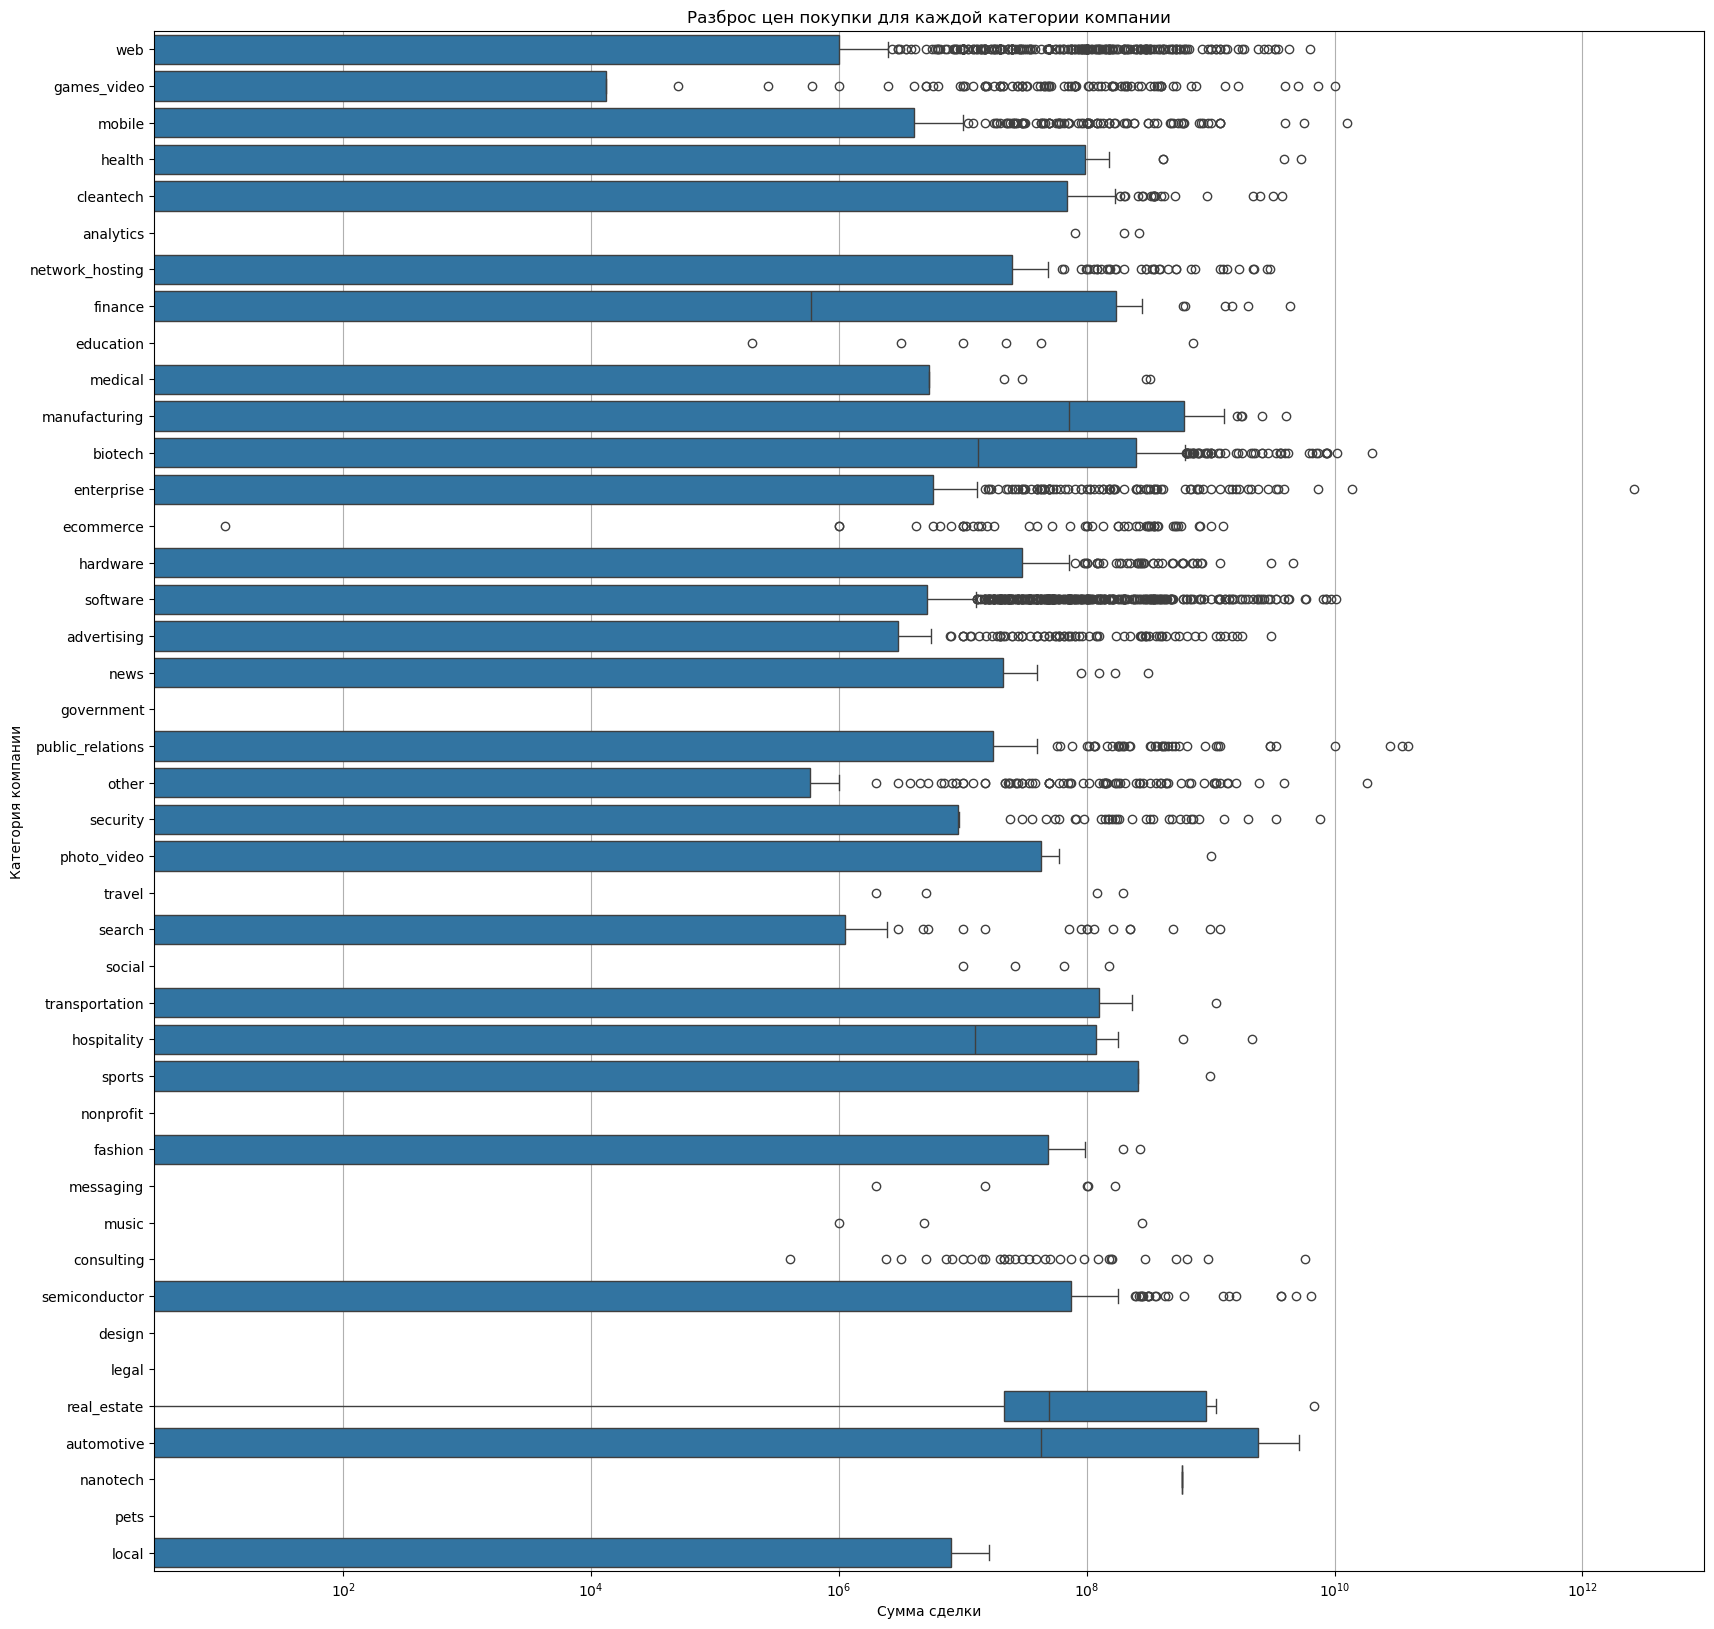

In [99]:
plt.figure(figsize=(20, 20))
sns.boxplot(data=filtered_companies, y='category_code', x='price_amount', orient='h')
plt.yticks(rotation=0) 
plt.xscale("log")
plt.grid(True, axis="x")
plt.title("Разброс цен покупки для каждой категории компании")
plt.ylabel("Категория компании")
plt.xlabel("Сумма сделки")
plt.show()

С помощью таких диаграмм по категориям стартапов я выделю компании, характеризующиеся типично высокими ценами: 
- automotive
- real_estate
- manufacturing
- biotech
- sports
- finance

Среди категорий, характеризующихся наибольшим разбросом цен я выделю:
- games_video
- web
- software
- enterprise


### 3.5. Сколько раундов продержится стартап перед покупкой

In [100]:
filtered_companies.groupby('status').funding_rounds.mean()

status
acquired     0.526089
closed       1.381453
ipo          1.934375
operating    1.522658
Name: funding_rounds, dtype: float64

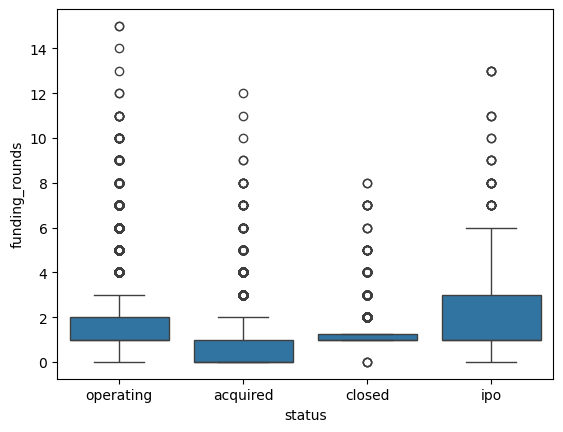

In [101]:
sns.boxplot(data=filtered_companies,y='funding_rounds', x='status');

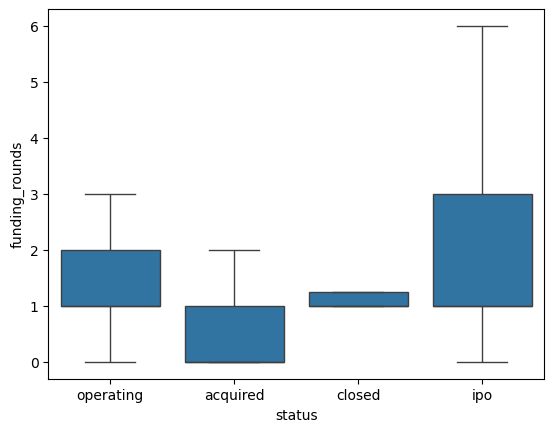

In [102]:
sns.boxplot(data=filtered_companies,y='funding_rounds', x='status', showfliers=False);

## Посмотрим на типичное значение количества раундов финансирования по статусам: 
- Компании, которые продолжают действовать, обычно имеют 1-2 раунда финансирования, но есть случаи, когда их больше, число может доходить до 15 раундов. Среднее количество раундов 1.522658, что близко к показателю ipo, компании еще ращзвиваются и возможно, смогут выйти на биржу.

- Компании, которые были выкуплены, имеют самый маленький средний показатель, обычно не получали финансирования, либо получали его совсем не долго, 1 раунд, хотя в редких случаях число раундов доходит и до 12. 

- Компании, которые были закрыты, имеют 1 раунд в среднем, но даже судя по выбросам, у них в целом меньше всего раундов, не более 8. Возможно, они не смогли привлечь достаточное количество инвесторов.

- Компании, вышедшие на биржу (ipo) имеют самый высокий показатель среднего количества раундов, число стремится к от 1 до 3, но и разброс количества раундов самый большой, от 0 до 6 раундов. Что логично, так как для выхода на публичный рынок нужно привлекать значительное финансирование. 


## Шаг 4. Итоговый вывод и рекомендации

В ходе исследования я проанализировала данные 40890 компаний, их категориях, статусах, о количестве их инвестиционных раундов и раундов финансирования, о суммах их финансирования, о годах их покупки и о сумме, за которую они были выкуплены. Основной фокус исследования был на поиске факторов, которые помогут инвестору определить, насколько выгодна может быть покупка, какие категории прибыльнее всего, и возможно ли выкупить компанию за 1 доллар?

Чтобы лучше представить себе рынок стартапов, я сосредоточилась на тех компаниях, которые получали финансирование в любом объеме и имеют хотя бы 1 инвестиционный раунд или раунд финансирования. 

Что представляет собой рынок стартапов: это компании, которые поделены на 42 категории, среди которых преобладают software, web, enterprise и mobile. Большая часть их них получали финансирование в объеме до 8 млн. И более половина тких компаний в итоге были выкуплены за 1 доллар, или даже бесплатно. Наблюдается четкая тенденция к росту таких компаний, которая совпадает с падением уровня инвестиций с 2005 года. 

Исследование показало, что наиболее высокие цены присутствуют в категориях automotive, real_estate, manufacturing, biotech, sports, finance, а наибольший разброс цен присущ секторам games_video, web, software, enterprise. Компании могут иметь много раундов финансирования, но те, что были выкуплены, обычно выкупаются довольно быстро, даже до финансирования инвесторами. 

Рекомендации:
1. Стоит обратить внимание на компании, которые получали небольшой объем финансирования, либо которые еще вообще его не получали, например, типичный размер средств в рамках одного этапа финансирования находится на отметке ниже 800 тыс, а большая часть компаний, которые были выкуплены не имеют ни одного раунда финансирования. 
2. Среди всех категорий особого внимания стоят категории games_video, web, software, enterprise, так как в них самый большой разброс цен. Также выгодно покупаются категории automotive, real_estate, manufacturing, biotech, sports, finance. 
3. Если  идея купить какой-нибудь стартап за 1 доллар выглядит привлекательной, то стоит присмотреться к секторам software, web, enterprise, mobile, там выше всего доля таких покупок. Три четверти таких компаний были куплены до того, как объем финансирования достиг суммы 15 млн.
4. Количество раундов финансирования - важный показатель, чем меньше раундов, тем вероятнее покупка, а если раундов финансирования было слишком много, возможно, компания не может окупить свои расходы?
